In [1]:
import sys
sys.path.append("../src")
import numpy as np
from opt_summary import OptSummary
from sd_summary import SDSummary
from no_del_summary import NoDeletionSummary
from utils import *
import time
plt.rc('axes', axisbelow=True)
%matplotlib inline

### In the cell below you can specify the parameters for the sampling experiments on synthetic data.
- frac: float in [0.0, 0.1]. The percentage of the dataset that will be used for the initial histogram creation, as described in the paper.(The paper uses 10% and 20%, however other values can be tested easily, as the experiment runs quite fast)


In [2]:
frac = 0.1

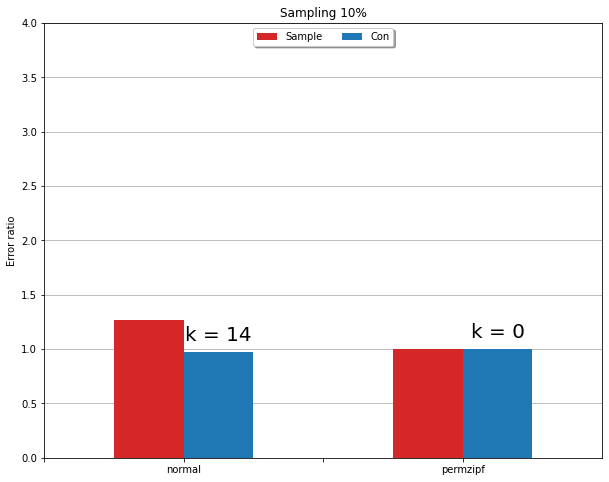

In [3]:
iterations = 3
beta = 10

no_del_errors = []
sample_errors = []
con_errors = []
num_dels = []


np.random.seed(0)
for it in range(iterations):

    values_full, f_full = generate_norm_data(1, 100, 0.25, 50_000)
    values, f = sample_data(values_full, f_full, frac)

    test_full = NoDeletionSummary(values_full, f_full, beta)
    e1 = test_full.summarize()
    e1 = e1/values_full[-1]
    no_del_errors.append(e1)

    test = NoDeletionSummary(values, f, beta)
    e2 = test.summarize()
    left, right, n = test.getBucketRanges()

    b_counter = np.zeros(beta).astype(int)
    num_del = 0

    for  i, val in enumerate(values_full):
        found = 0
        bucket_no = 0
        for l,r in zip(values[left],values[right]):
            if val >= l and val <= r:
                found = 1
                b_counter[bucket_no] += f_full[i]
                break
            bucket_no += 1
        if found == 0:
            num_del += f_full[i]
    num_dels.append(num_del)

    left_full1 = np.searchsorted(values_full, values[left])
    right_full1 = np.searchsorted(values_full, values[right])

    err_summ = 0
    for l,r in zip(left_full1,right_full1):
        err_summ += test_full.sqerror[l,r]

    e3 = err_summ /values_full[right_full1[-1]]
    sample_errors.append(e3)
    
    k = num_del
    test = OptSummary(values_full, f_full, beta, k, method='con')
    err = test.summarize(k)
    
    con_errors.append(err/values_full[-1])
                                      
no_del = np.mean(no_del_errors)
sample_err = np.mean(sample_errors)
con_err = np.mean(con_errors)
num_del = np.mean(num_dels)
                                      
width = 0.5
pos = 1 - width/2
color = ['tab:red', 'tab:blue']
plt.figure(figsize=(10,8))
plt.title(f'Sampling {int(frac*100)}%')
plt.grid(axis='y', zorder=0)
plt.bar(pos, sample_err/no_del, color = color[0], width=width, label='Sample')
plt.ylim([0,4])
pos2 = 1 + width/2
plt.bar(pos2, con_err/no_del, color = color[1], width=width, label='Con')
plt.text(pos2 , y = (con_err/no_del) + 0.1 , s=f"k = {int(num_del)}" , fontdict=dict(fontsize=20, ha='center'))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=2, fancybox=True, shadow=True)

no_del_errors = []
sample_errors = []
con_errors = []
num_dels = []

np.random.seed(0)
for it in range(iterations):
    values_full, f_full = generate_permzipf_data(1, 100, 0.85, 50_000)
    values, f = sample_data(values_full, f_full, frac)

    test_full = NoDeletionSummary(values_full, f_full, beta)
    e1 = test_full.summarize()
    no_del_errors.append(e1)

    test = NoDeletionSummary(values, f, beta)
    e2 = test.summarize()
    left, right, n = test.getBucketRanges()

    b_counter = np.zeros(beta).astype(int)
    num_del = 0

    for  i, val in enumerate(values_full):
        found = 0
        bucket_no = 0
        for l,r in zip(values[left],values[right]):
            if val >= l and val <= r:
                found = 1
                b_counter[bucket_no] += f_full[i]
                break
            bucket_no += 1
        if found == 0:
            num_del += f_full[i]
    num_dels.append(num_del)

    left_full1 = np.searchsorted(values_full, values[left])
    right_full1 = np.searchsorted(values_full, values[right])

    err_summ = 0
    for l,r in zip(left_full1,right_full1):
        err_summ += test_full.sqerror[l,r]

    e3 = err_summ
    sample_errors.append(e3)
    
    k = num_del
    test = OptSummary(values_full, f_full, beta, k, method='con')
    err = test.summarize(k)
    
    con_errors.append(err)
                                 
no_del = np.mean(no_del_errors)
sample_err = np.mean(sample_errors)
con_err = np.mean(con_errors)
num_del = np.mean(num_dels)

pos = 3 - width/2
plt.bar(pos, np.round(sample_err/no_del, 5), color = color[0], width=width, label='Sample')
plt.ylim([0,4])
plt.ylabel('Error ratio')
pos2 = 3 + width/2
plt.bar(pos2, con_err/no_del, color = color[1], width=width, label='Con')
plt.text(pos2 , y = (con_err/no_del) + 0.1 , s=f"k = {int(num_del)}" , fontdict=dict(fontsize=20, ha='center'))
plt.xlim([0, 4])
plt.xticks(range(0,4), ['', 'normal', '', 'permzipf'])
plt.show()
